In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
#data2=kgs.load_all_test_data()+
data2=kgs.load_all_train_data()

In [3]:
data = data2[8000:8001]
data[0].family

'Style_A'

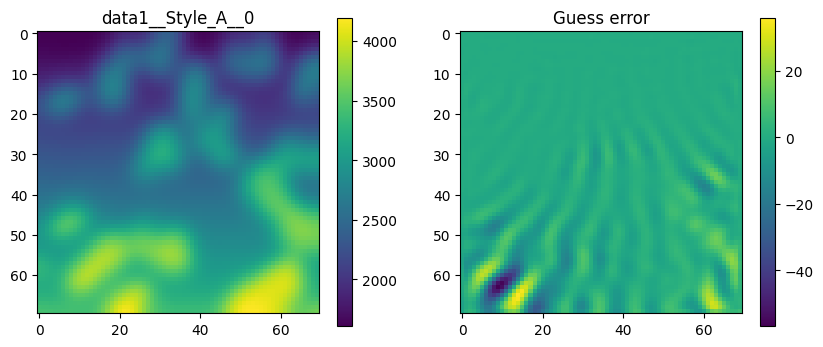

diag 1.9656961788752064e-05


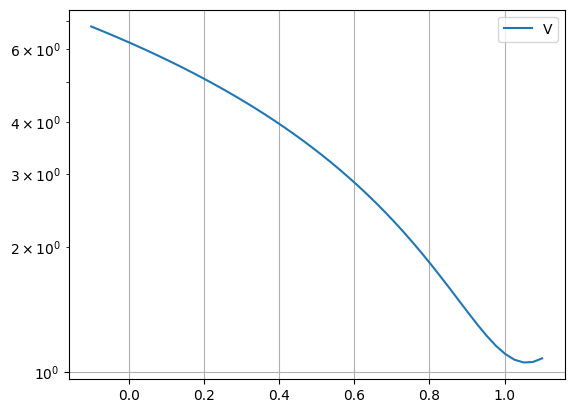

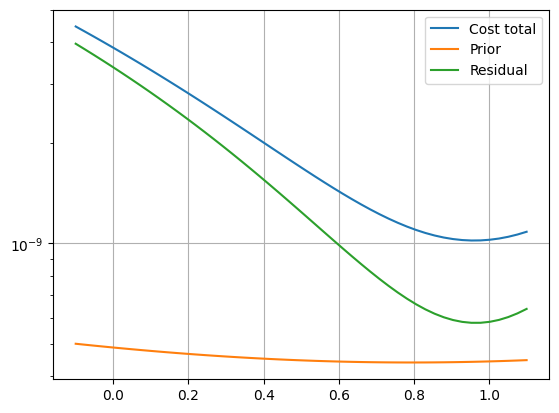

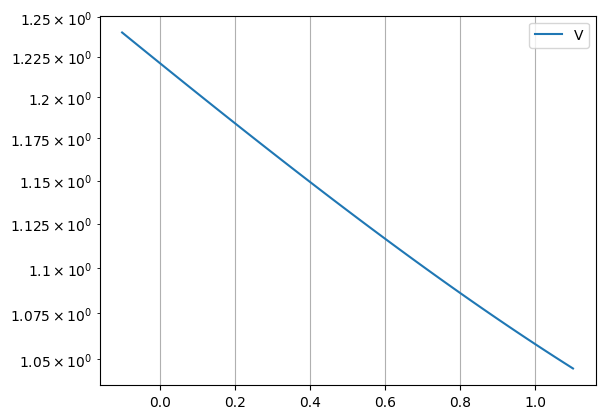

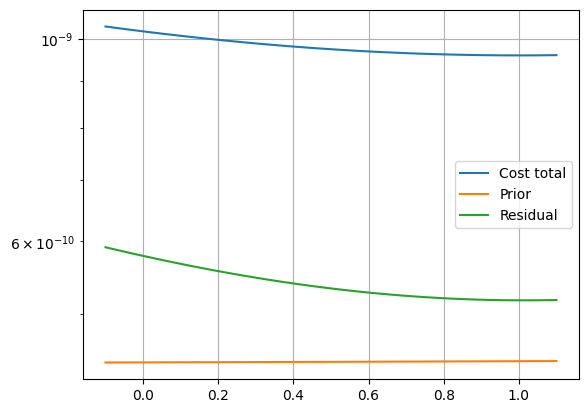

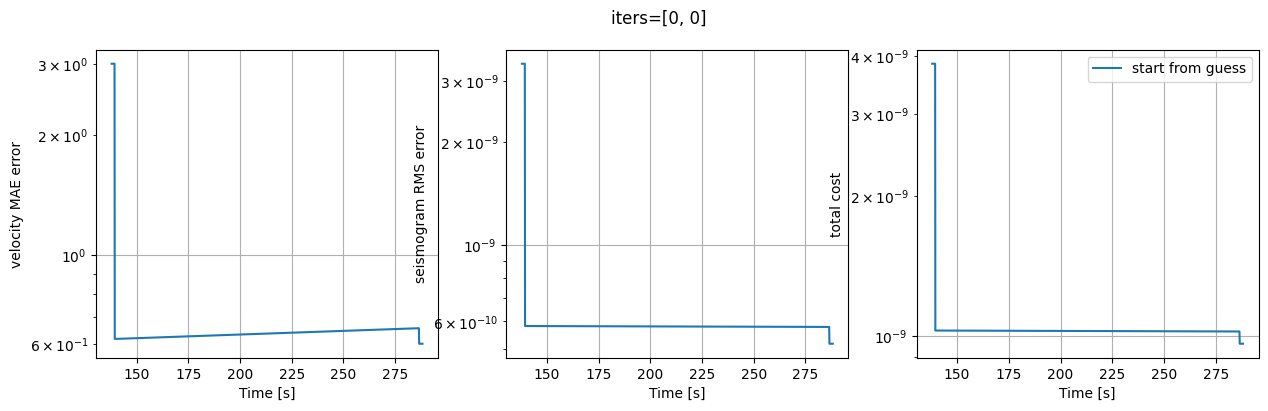

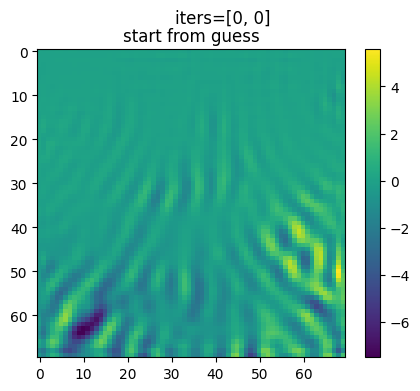

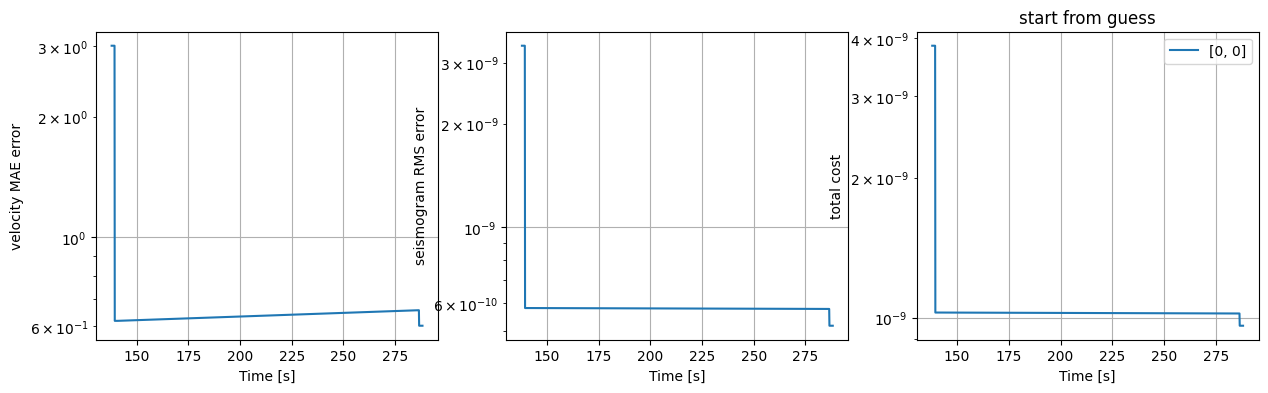

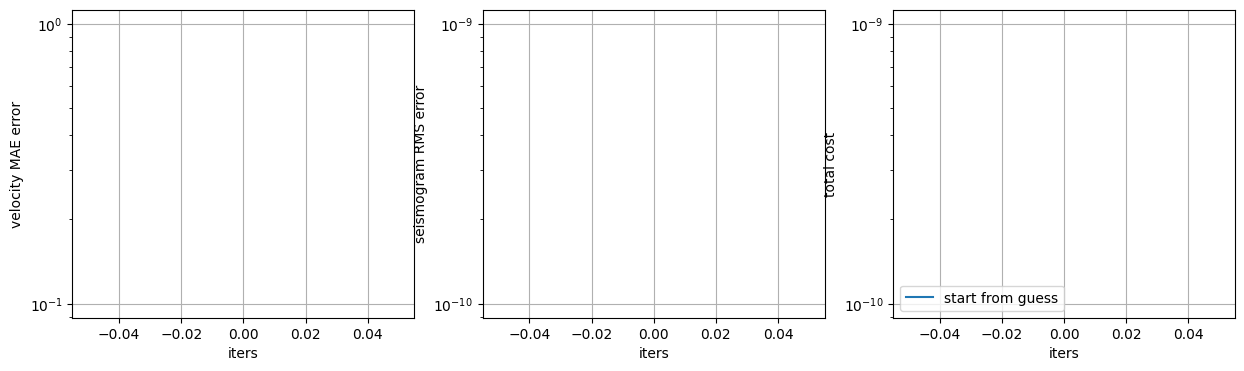

In [7]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
xx = copy.deepcopy(seis_model.default_model())
model = copy.deepcopy(xx.models[1].model_Style_A)
model.show_convergence = True
#model.iter_list = [-3000]
#model.prior.noise = 0.6
#model.prior.transform = False
#model.prior.svd_cutoff = -1.
#model.prior.λ = 10**-12

start_model = copy.deepcopy(xx.models[1].model_Style_A)

do_which_list = [False,False,True]

def param_func(model,value):
    model.iter_list = value
    return model
    
param_values = [[0,0]]
param_name = "iters"


for d in data:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0., start_model = start_model)